this code is for nucleus segmentation & # of cell

In [2]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

In [3]:
# Load the image
figName = '../Drug7_1000nM/rep1_FOV1.tif'
img = imread(str(figName))
type(img)
#use the first frame of the red channel
gray = img[1, :, :, :3]

C:\Users\luckm\AppData\Local\Temp\ipykernel_29788\162363943.py:5: UserWarning: threshold_multiotsu is expected to work correctly only for grayscale images; image shape (650, 650, 3) looks like that of an RGB image.
  thresholds = filters.threshold_multiotsu(gray, classes=3)


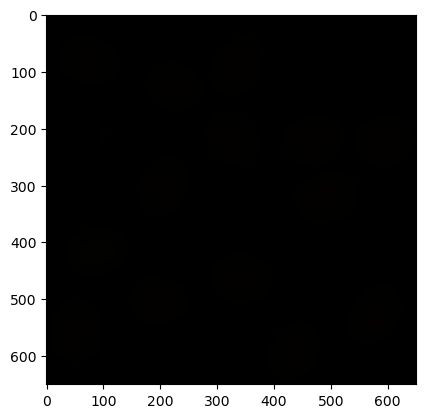

In [4]:
from skimage import filters
import numpy as np

# use multiotsu to calculate two thresholds
thresholds = filters.threshold_multiotsu(gray, classes=3)

# use the threshold to segment the image into 3 regions
regions = np.digitize(gray, bins=thresholds)

# Display the image and plot all the regions
plt.imshow(regions, cmap='nipy_spectral')
plt.show()

In [5]:
plt.imshow(regions>0)
plt.show()

ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

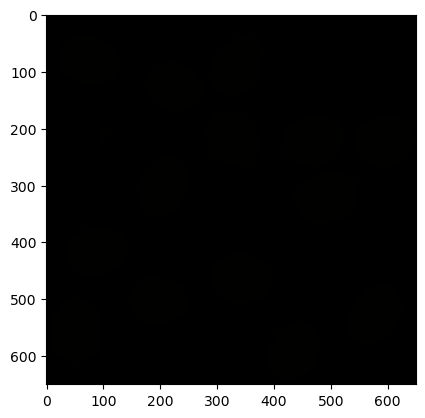

In [6]:
from skimage import measure
# use the threshold to segment the image in binary
binary = regions > 0

# label connected regions
labels = measure.label(binary)

# show the result
plt.imshow(labels, cmap='nipy_spectral')
plt.show()

In [7]:
cell_number=labels.max()
n_size=np.zeros(cell_number)
for i in range(1,labels.max()+1):
    n_size[i-1]=sum(sum(labels==i))

# delete the label of non-cell regions
# calculate the threshold of area(10% of the largest cell area)
threshold = n_size.max() / 10

# find the labels of the regions with area larger than the threshold
valid_labels = np.where(n_size > threshold)[0] + 1

from scipy import ndimage

# filter out labels with area smaller than the threshold
filtered_labels = np.isin(labels, valid_labels) * labels

# relabel connected regions
relabelled, n_features = ndimage.label(filtered_labels > 0)

# print the number of cells
cell_number=relabelled.max()
print('cell number is '+str(cell_number))

# calculate and print the area of each label
new_n_size = np.zeros(n_features)

for i in range(1, n_features+1):
    new_n_size[i-1] = np.sum(relabelled == i)
    print('size of cell nucleus ' + str(i) + ' is ' + str(new_n_size[i-1]) + ' pixels')

ValueError: setting an array element with a sequence.

In [9]:
from cellpose import plot, models

main output: relabelled (To identify every nucleus)

In [34]:
#
from skimage.filters import difference_of_gaussians
grape = img[0, :, :, 1] 
use_GPU = True
model = models.Cellpose(gpu = use_GPU, model_type='cyto') # model_type='cyto' or model_type='nuclei'
masks  = model.eval(grape, diameter=150)[0]
# Plotting each one of the 3 colors independently
fig, ax = plt.subplots(1,2, figsize=(20, 7))
ax[0].imshow(grape,cmap='Greys_r')
ax[1].imshow(masks,cmap='Spectral')
ax[0].axis('off')
ax[1].axis('off')
plt.show()
print('number of detected cells: ', np.max(masks))
def calculate_cell_intensity(image, masks):
    cell_intensities = []
    for cell_id in range(1, np.max(masks) + 1):
        # Extract the mask for the current cell
        cell_mask = (masks == cell_id)
        
        # Calculate the mean intensity within the cell
        cell_intensity = np.mean(image[cell_mask])
        cell_intensities.append(cell_intensity)
    
    return cell_intensities

# Calculate cell intensities
cell_intensities = calculate_cell_intensity(grape, masks)

# Print the intensities of each cell
for cell_id, intensity in enumerate(cell_intensities, start=1):
    print(f"Cell {cell_id}: Intensity = {intensity:.2f}")

cell_images = []

# Create individual cell images
for cell_id in range(1, np.max(masks) + 1):
    cell_mask = (masks == cell_id)
    cell_image = grape.copy()
    cell_image[~cell_mask] = 0  # Set non-cell pixels to black
    cell_images.append(cell_image)

def calculate_cell_intensity(image, masks):
    cell_intensities = []
    for cell_id in range(1, np.max(masks) + 1):
        cell_mask = (masks == cell_id)
        cell_intensity = np.mean(image[cell_mask])
        cell_intensities.append(cell_intensity)
    return cell_intensities

# Calculate cell intensities
cell_intensities = calculate_cell_intensity(grape, masks)

# Show each cell in separate images
for cell_id in range(1, np.max(masks) + 1):
    cell_mask = (masks == cell_id)
    cell_image = grape.copy()
    cell_image[~cell_mask] = 0  # Set non-cell pixels to black
    cell_images.append(cell_image)

    plt.figure(figsize=(5, 5))
    plt.imshow(cell_image, cmap='Greys_r')
    plt.title(f"Cell {cell_id} (Intensity: {cell_intensities[cell_id - 1]:.2f})")
    plt.axis('off')
    plt.show()




NameError: name 'end' is not defined

In [33]:
import pandas as pd

# Assuming you have a list of cell intensities (replace with your actual data)
cell_intensities = [89.18, 72.71, 64.48, 97.24, 83.33, 103.78, 94.70, 104.12, 125.86, 89.42, 69.25, 76.45, 93.88, 81.24]

# Create a pandas DataFrame with a single column named 'Intensity'
df = pd.DataFrame(cell_intensities, columns=['Intensity'])

df.index = df.index + 1

# Display the DataFrame
print(df)

    Intensity
1       89.18
2       72.71
3       64.48
4       97.24
5       83.33
6      103.78
7       94.70
8      104.12
9      125.86
10      89.42
11      69.25
12      76.45
13      93.88
14      81.24
